# BaseLine cơ bản cho cuộc thi
Một cái *bây lai* theo hướng tiếp cận nhẹ nhàng tình cảm, sử dụng mô hình SVM. Bắt đầu thôi 😉.

### Mổ xẻ Dataset

#### Load Data

In [ ]:
# Import một số thư viện cần thiết
import pandas as pd


# B1: Load data
# Load data từ link google drive
def load_from_google(url):
  # Lấy id của file
  id = url.split('/')[-2]
  # Tạo link downloads:
  download_url = 'https://drive.google.com/uc?id=' + id
  # Load file từ link downloads
  data = pd.read_csv(download_url)
  return data

# Thay link của data zô đây
train_url = 'https://drive.google.com/file/d/1XQvqilSJNvWRMUptg7zbyZvryZF95gyo/view?usp=sharing'
# Load data train từ link
train = load_from_google(train_url)
# Show hàng 5 giá trị đầu
train.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,blood,height,stroke
0,77,Female,NaN,0.0,0.0,No,children,Unknown,85.81,18.6,Unknown,O,NaN,0
1,84,Male,55.0,0.0,0.0,Yes,Private,Urban,89.17,NaN,never smoked,B,1.59,0
2,91,Female,42.0,0.0,0.0,No,Private,Unknown,98.53,18.5,never smoked,B,NaN,0
3,99,Female,31.0,0.0,0.0,No,Private,Urban,108.89,52.3,Unknown,O,1.24,0
4,121,Female,38.0,0.0,0.0,Yes,Private,Unknown,91.44,NaN,Unknown,O,NaN,0


In [ ]:
# Load data test từ link google drive
test_url = 'https://drive.google.com/file/d/12eC_nBt7W0hF_HmFxoXw3SL0d7oLkQqJ/view?usp=sharing'
test = load_from_google(test_url)

test.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,blood,height
0,67,Female,17.0,0.0,0.0,No,Private,Urban,92.97,NaN,formerly smoked,AB,NaN
1,210,Male,81.0,0.0,0.0,Yes,Self-employed,Rural,91.54,31.4,never smoked,A,1.60
2,242,Male,4.0,NaN,0.0,No,children,Urban,98.56,17.5,Unknown,O,NaN
3,711,Male,81.0,0.0,NaN,Yes,Private,Rural,92.96,22.2,never smoked,AB,NaN
4,724,Male,17.0,0.0,0.0,No,Private,Rural,81.77,44.7,never smoked,O,1.34


#### Xem thông tin của tập train

In [ ]:
# Xem kích thước data
train.shape

(4000, 14)

In [ ]:
# Check info data 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4000 non-null   int64  
 1   gender             4000 non-null   object 
 2   age                3893 non-null   float64
 3   hypertension       3770 non-null   float64
 4   heart_disease      3910 non-null   float64
 5   ever_married       4000 non-null   object 
 6   work_type          4000 non-null   object 
 7   Residence_type     4000 non-null   object 
 8   avg_glucose_level  3829 non-null   float64
 9   bmi                2884 non-null   float64
 10  smoking_status     4000 non-null   object 
 11  blood              3990 non-null   object 
 12  height             2928 non-null   float64
 13  stroke             4000 non-null   int64  
dtypes: float64(6), int64(2), object(6)
memory usage: 437.6+ KB


**Nhận xét**: Có một số cột chứa giá trị null, một số thì có kiểu dữ liệu object. 

**Giải quyết**: Vì đây là một baseline đơn giản và ngây ngô nên mình sẽ bỏ những **cột** có kiểu dữ liệu object và bỏ đi những **hàng** có giá trị null.

In [ ]:
# Thống kê một số giá trị của data
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,4000.0,36294.336250,21213.704061,77.00,17294.00,36688.50,54425.0000,72918.00
age,3893.0,43.071256,22.425944,0.08,25.00,45.00,61.0000,82.00
hypertension,3770.0,0.097613,0.296830,0.00,0.00,0.00,0.0000,1.00
heart_disease,3910.0,0.055243,0.228483,0.00,0.00,0.00,0.0000,1.00
avg_glucose_level,3829.0,106.178062,45.048667,55.22,77.50,92.11,114.0900,267.76
bmi,2884.0,28.887899,7.904179,11.30,23.50,28.00,33.0000,97.60
height,2928.0,1.611831,0.149053,0.91,1.52,1.63,1.7225,1.85
stroke,4000.0,0.032500,0.177346,0.00,0.00,0.00,0.0000,1.00


#### Biểu đồ thống kê Dataset


ValueError: ignored

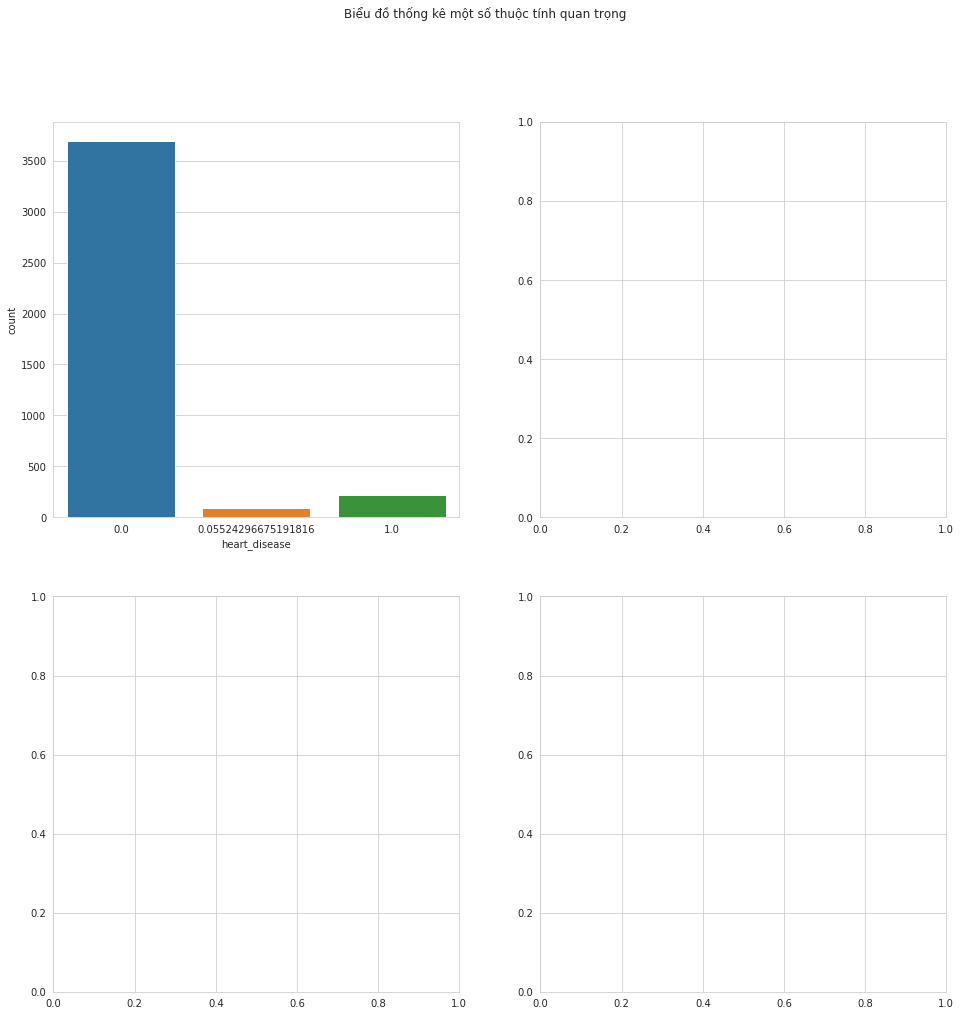

In [ ]:
# Import thư viện cần thiết
import matplotlib.pyplot as plt
import seaborn as sns

def Bieu_do_thong_ke(data):
# Tạo một bảng chứa các biểu đồ
  fig,axes = plt.subplots(2,2,figsize = (16,16))
  sns.set_style('whitegrid')
  fig.suptitle("Biểu đồ thống kê một số thuộc tính quan trọng")

  sns.countplot(ax=axes[0,0],data=data,x='heart_disease')
  sns.countplot(ax=axes[0,1],data=data,x='blood')
  sns.distplot(a=data['age'], ax=axes[1,0],hist= True)
  sns.distplot(a=data['height'], ax=axes[1,1],hist= True)
  plt.show()
  sns.countplot(x='stroke', data=train)

#Biểu đồ thống kê tập train
Bieu_do_thong_ke(train)

**Nhận xét**: Nhìn chung data mới vô khi nào cũng rất chi là khoai, các giá trị phân bố không đều, bị lệch nhiều. Riêng với bộ data này, nhãn bị lệch thiên về 0.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


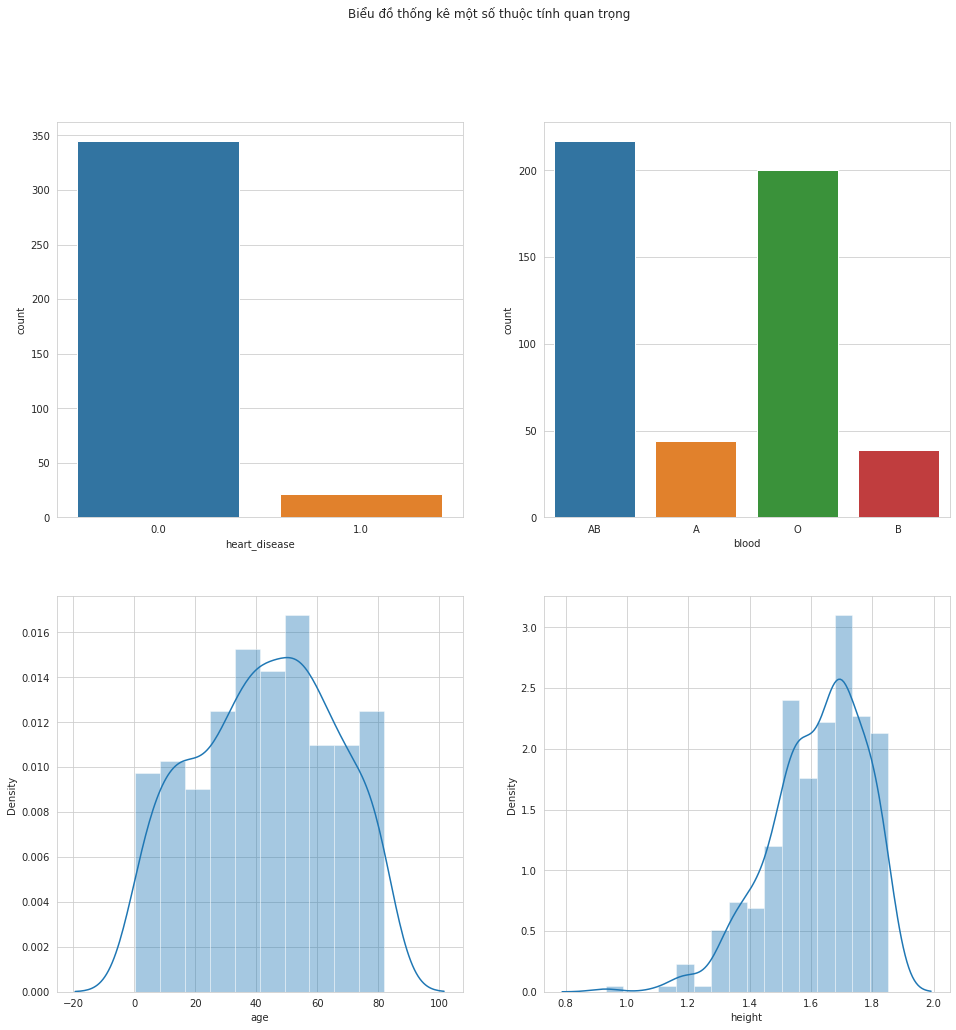

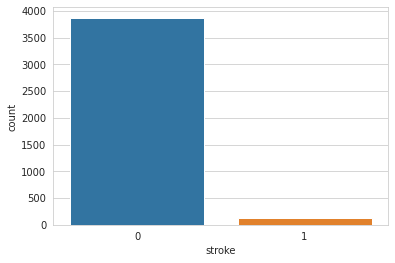

In [ ]:
#Biểu đồ thống kê tập test
Bieu_do_thong_ke(test)

#### Tiền xử lý Data
Sau khi xong công đoạn tìm hiểu, chúng ta sẽ tiến đến giai đoạn "xử lý" em nó. Bằng cách nào nhỉ? Kéo xuống để tìm hiểu thêm!

In [ ]:
train = train.drop(['height'], axis=1)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   heart_disease      4000 non-null   float64
 1   avg_glucose_level  4000 non-null   float64
 2   bmi                4000 non-null   float64
 3   stroke             4000 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 125.1 KB


##### Xóa cột id

##### Xóa cột chứa kiểu dữ liệu object

In [ ]:
# Liệt kê những cột có kiểu dữ liệu là object
object_columns = [i for i in train.keys() if train[i].dtypes == object]
# Xóa bỏ những cột có kiểu dữ liệu là object
train = train.drop(object_columns, axis=1)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                3893 non-null   float64
 1   hypertension       3770 non-null   float64
 2   heart_disease      3910 non-null   float64
 3   avg_glucose_level  3829 non-null   float64
 4   bmi                2884 non-null   float64
 5   height             2928 non-null   float64
 6   stroke             4000 non-null   int64  
dtypes: float64(6), int64(1)
memory usage: 218.9 KB


##### Lấy trung bình hàng có giá trị null

In [ ]:
# Xóa hàng có giá trị null hoặc rỗng
# train = train.dropna(axis=0)
train['age'].fillna(value=train['age'].mean(), inplace=True)
train['hypertension'].fillna(value=train['hypertension'].mean(), inplace=True)
train['heart_disease'].fillna(value=train['heart_disease'].mean(), inplace=True)
train['avg_glucose_level'].fillna(value=train['avg_glucose_level'].mean(), inplace=True)
train['bmi'].fillna(value=train['bmi'].mean(), inplace=True)
train['height'].fillna(value=train['height'].mean(), inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                4000 non-null   float64
 1   hypertension       4000 non-null   float64
 2   heart_disease      4000 non-null   float64
 3   avg_glucose_level  4000 non-null   float64
 4   bmi                4000 non-null   float64
 5   height             4000 non-null   float64
 6   stroke             4000 non-null   int64  
dtypes: float64(6), int64(1)
memory usage: 218.9 KB


In [ ]:
# # Thực hiện tương tự với tập test
test = test.drop(object_columns, axis=1)

test['age'].fillna(value=test['age'].mean(), inplace=True)
test['hypertension'].fillna(value=test['hypertension'].mean(), inplace=True)
test['heart_disease'].fillna(value=test['heart_disease'].mean(), inplace=True)
test['avg_glucose_level'].fillna(value=test['avg_glucose_level'].mean(), inplace=True)
test['bmi'].fillna(value=test['bmi'].mean(), inplace=True)
test['height'].fillna(value=test['height'].mean(), inplace=True)
test.info()

KeyError: ignored

### Huấn luyện mô hình
Vậy là đã xong bước xử lý data, giờ là lúc chúng ta huấn luyện để cho ra một em model ngoan ngoãn vâng lời, biết giải quyết bài toán mình đặt ra.

In [ ]:
# Chọn những cột đặc trưng
features_columns = train.keys()
features_columns = features_columns.drop('stroke')
print(features_columns)

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'height'],
      dtype='object')


In [ ]:
def get_Xy(data):  
  X = data[features_columns]

  y = data['stroke']
  return X, y

X_train, y_train = get_Xy(train)


#### Fit mất cân bằng dữ liệu

Counter({0: 9900, 1: 100})
Counter({0: 1980, 1: 990})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


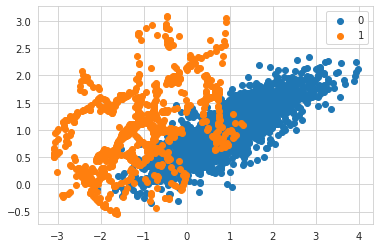

In [ ]:
# Oversample with SMOTE and random undersample for imbalanced dataset
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from matplotlib import pyplot
from numpy import where
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# summarize class distribution
counter = Counter(y)
print(counter)
# define pipeline
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
# transform the dataset
X, y = pipeline.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

#### Lấy model từ thư viện Sklearn

In [ ]:
from sklearn.svm import SVC
model_svm = SVC()
model_svm.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = model_svm.predict(test[features_columns])

In [ ]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

### Submit

In [ ]:

submit = pd.DataFrame(zip(test.id, y_pred), columns=['id', 'stroke'])
import math, requests
## Thay token bằng token của bạn nhé !
def submit_prediction(df, sep=',', comment='', compression='gzip', **kwargs):
    TOKEN='611f098f4e51d680ecf0efc2e338feceba6a5a11c785f8001403e79c39f3b99bb058539eef4855b52e73e9bd2a06127e70b0aef557428c5af93e3be2eef1d514'
    URL='http://submission.mmlab.uit.edu.vn/api/submissions'
    df.to_csv('temporary.dat', sep=sep, compression=compression, **kwargs)
    r = requests.post(URL, headers={'Authorization': 'Bearer {}'.format(TOKEN)},files={'datafile': open('temporary.dat', 'rb')},data={'comment':comment, 'compression': compression})
    if r.status_code == 429:
        raise Exception('Submissions are too close. Next submission is only allowed in {} seconds.'.format(int(math.ceil(int(r.headers['x-rate-limit-remaining']) / 1000.0))))
    if r.status_code != 200:
        raise Exception(r.text)
              
submit_prediction(submit, sep=',', index=True, comment='svm')

Exception: ignored

In [ ]:
# submit.to_csv('submit.csv')